In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import requests
import csv
import matplotlib.pyplot as plt

In [2]:
# Fetching data from the URL
url = 'https://www.bola.net/klasemen/spanyol.html'
response = requests.get(url)
response


<Response [200]>

In [3]:
# Reading HTML tables into a list of DataFrame objects
data_LaLiga= pd.read_html(url)
df1 = data_LaLiga[0]
df1


,Pos Team,Main,Poin,Menang,Seri,Kalah,Goal,-/+
0,1 Real Madrid,38,95,29,8,1,87,61
1,2 Barcelona,38,85,26,7,5,79,35
2,3 Girona,38,81,25,6,7,85,39
3,4 Atletico Madrid,38,76,24,4,10,70,27
4,5 Athletic Club,38,68,19,11,8,61,24
5,6 Real Sociedad,38,60,16,12,10,51,12
6,7 Real Betis,38,57,14,15,9,48,3
7,8 Villarreal,38,53,14,11,13,65,0
8,9 Valencia,38,49,13,10,15,40,-5
9,10 Alaves,38,46,12,10,16,36,-10


In [4]:
# Writing DataFrame to a CSV file
try:
    with open('LigaSpanyol.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        # Menulis header
        writer.writerow(df1.columns)
        # Menulis data
        for index, row in df1.iterrows():
            writer.writerow(row)
except Exception as e:
    print(f"ada yang salah, {e}")

In [5]:
# Loading data from CSV
data = 'LigaSpanyol.csv'
df2 = pd.read_csv(data)

In [6]:
# Displaying column names
df2.columns

Index(['Pos  Team', 'Main', 'Poin', 'Menang', 'Seri', 'Kalah', 'Goal', '-/+'], dtype='object')

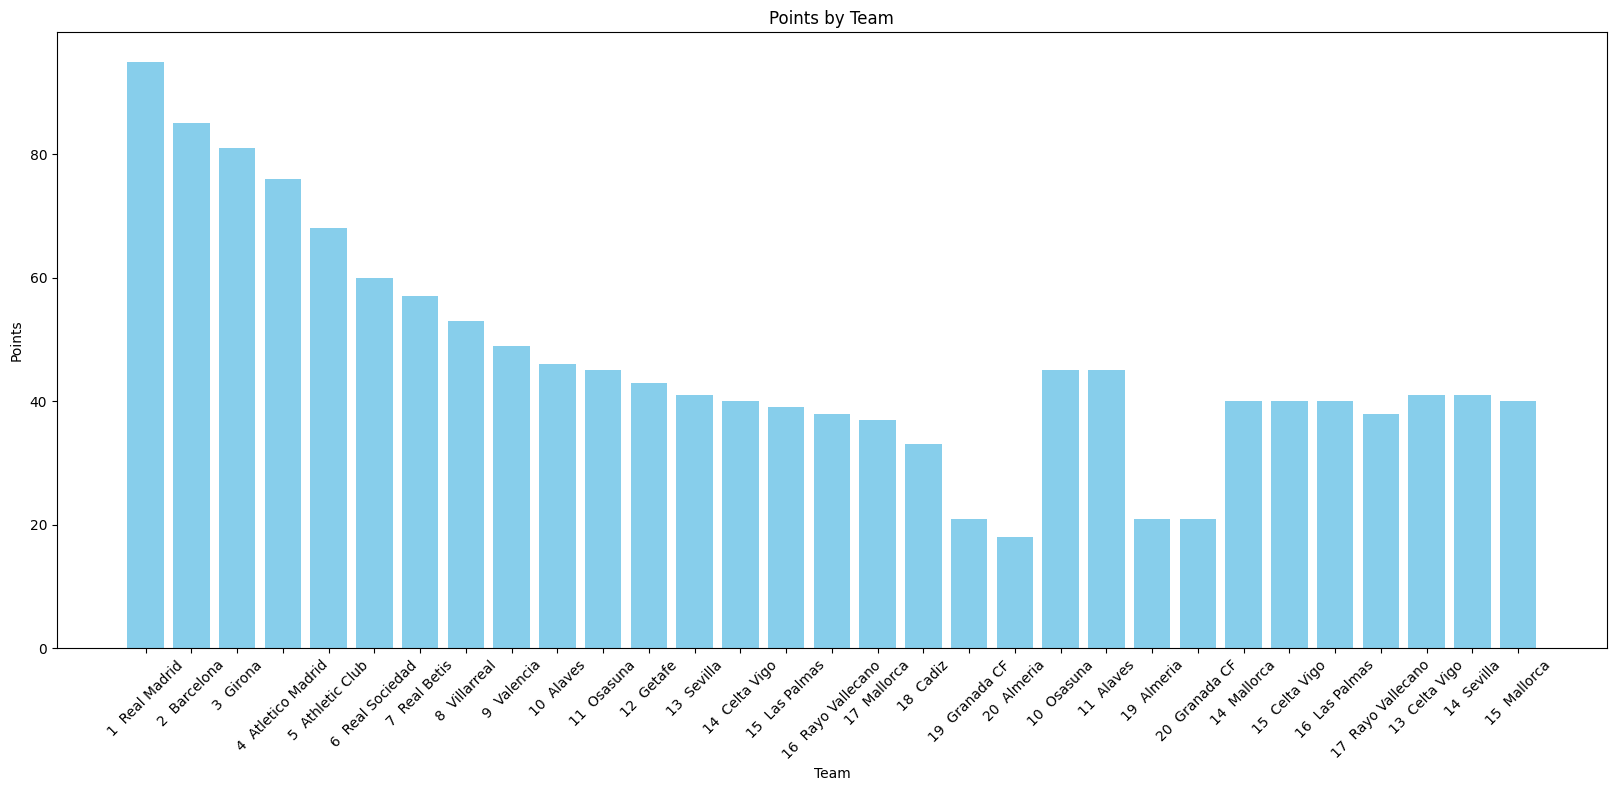

In [7]:
# Plotting bar chart for teams vs points
try:
    kolom_team = df2['Pos  Team']
    kolom_poin = df2['Poin']
    plt.figure(figsize=(20, 8))
    plt.bar(kolom_team, kolom_poin, color='skyblue')
    plt.xlabel('Team')
    plt.ylabel('Points')
    plt.title('Points by Team')
    plt.xticks(rotation=45)
    plt.show()
except Exception as e:
    print(f"ada yang salah, {e}")


In [8]:
# Assigning qualifications based on team positions
top_teams = df2.head(4)
top_teams['Kualifikasi'] = 'Liga Champions'

europa_teams = df2.iloc[4:6]
europa_teams['Kualifikasi'] = 'Liga Eropa'

konferensi_teams = df2.iloc[6:7]
konferensi_teams['Kualifikasi'] = 'Liga Konferensi Eropa'

stay_teams = df2.iloc[7:21]
stay_teams['Kualifikasi'] = 'Tetap di LaLiga'

degradasi_teams = df2.iloc[21:]
degradasi_teams['Kualifikasi'] = 'Degradasi'

# Combining all teams into one DataFrame
qualified_teams = pd.concat([top_teams, europa_teams, konferensi_teams, stay_teams, degradasi_teams])

# Displaying the result
qualified_teams

/tmp/ipykernel_14952/1819796637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_teams['Kualifikasi'] = 'Liga Champions'
/tmp/ipykernel_14952/1819796637.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europa_teams['Kualifikasi'] = 'Liga Eropa'
/tmp/ipykernel_14952/1819796637.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Pos Team,Main,Poin,Menang,Seri,Kalah,Goal,-/+,Kualifikasi
0,1 Real Madrid,38,95,29,8,1,87,61,Liga Champions
1,2 Barcelona,38,85,26,7,5,79,35,Liga Champions
2,3 Girona,38,81,25,6,7,85,39,Liga Champions
3,4 Atletico Madrid,38,76,24,4,10,70,27,Liga Champions
4,5 Athletic Club,38,68,19,11,8,61,24,Liga Eropa
5,6 Real Sociedad,38,60,16,12,10,51,12,Liga Eropa
6,7 Real Betis,38,57,14,15,9,48,3,Liga Konferensi Eropa
7,8 Villarreal,38,53,14,11,13,65,0,Tetap di LaLiga
8,9 Valencia,38,49,13,10,15,40,-5,Tetap di LaLiga
9,10 Alaves,38,46,12,10,16,36,-10,Tetap di LaLiga


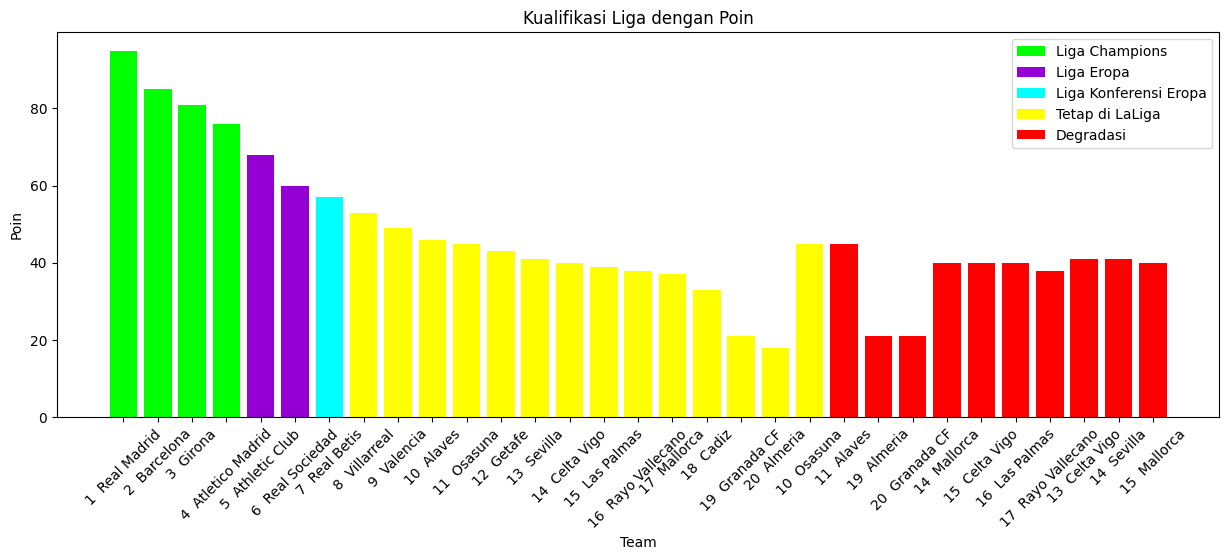

In [9]:
# Setting colors for each qualification and plotting
colors = {'Liga Champions': 'lime', 'Liga Eropa': 'darkviolet', 'Liga Konferensi Eropa': 'cyan', 'Tetap di LaLiga': 'yellow', 'Degradasi': 'red'}

plt.figure(figsize=(15, 5))

for kualifikasi, color in colors.items():
    teams = qualified_teams[qualified_teams['Kualifikasi'] == kualifikasi]
    plt.bar(teams['Pos  Team'], teams['Poin'], color=color, label=kualifikasi)

plt.xlabel('Team')
plt.ylabel('Poin')
plt.title('Kualifikasi Liga dengan Poin')
plt.xticks(rotation=45)
plt.legend()
plt.show()